<a href="https://colab.research.google.com/github/ldj7672/SDXL-LoRA-Fine-tuning-for-Ghibli-Style/blob/main/Ghibli_Style_Image_Generation_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🧩 필요한 패키지 설치
!pip install -q diffusers transformers accelerate huggingface_hub safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import DiffusionPipeline
from huggingface_hub import login
from PIL import Image
import os

In [3]:
from getpass import getpass

token = getpass("🔑 Hugging Face Token을 입력하세요:")
login(token=token)

🔑 Hugging Face Token을 입력하세요:··········


In [4]:
# 기타 파라미터 설정
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
lora_model_id = "moving-j/sdxl-base-1.0-ghibli-lora-r4"
num_inference_steps = 30
guidance_scale = 5.0
negative_prompt = "blurry, distorted, low quality"
seed = 42

In [ ]:
# 모델 로딩
pipe = DiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16,
    use_safetensors=True
)

# # LoRA 모델이 있을 경우 로딩
if lora_model_id:
    pipe.load_lora_weights(lora_model_id)

# CUDA 사용 가능 시
if torch.cuda.is_available():
    pipe = pipe.to("cuda")

generator = torch.Generator(device="cuda" if torch.cuda.is_available() else "cpu").manual_seed(seed)

print("✅ 모델 로딩 완료")

In [13]:
prompt = "The image is a Ghibli-style illustration of a young woman with dark hair and a white hat with a lavender ribbon. She is wearing a light yellow dress with a blue collar, and the background features a blue sky with fluffy white clouds and green trees."

In [ ]:
# 이미지 생성
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator
)
image = result.images[0]

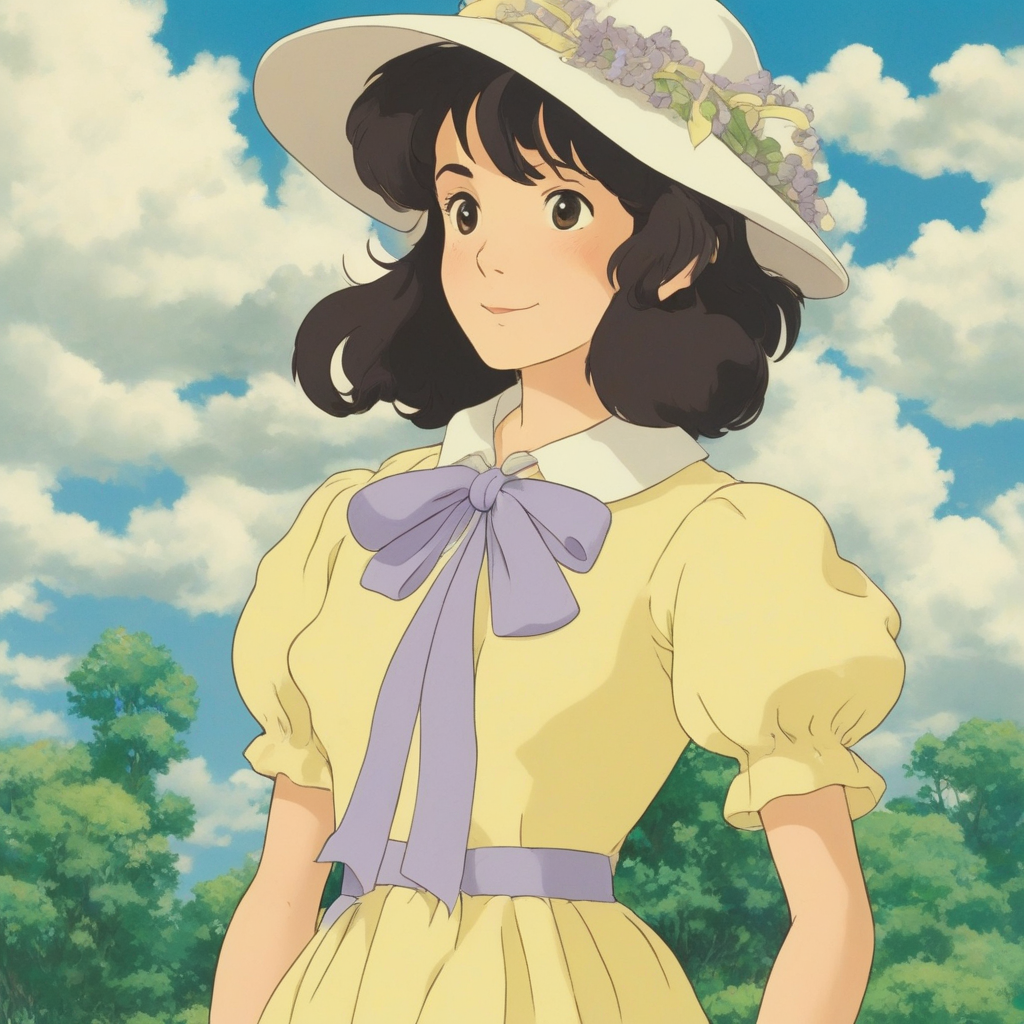

In [12]:
image